In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models.ccsn import Tamborra_2014
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

mpl.rc('font', size=16)
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/tqdm-4.65.0-py3.8.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Tamborra_2014.param

{'progenitor_mass': <Quantity [20., 27.] solMass>}

In [3]:
m20 = Tamborra_2014(progenitor_mass=20*u.solMass)
m27 = Tamborra_2014(progenitor_mass=27*u.solMass)

m20

**Tamborra_2014 Model**

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $20$ $\mathrm{M_{\odot}}$|
|EOS | LS220 |

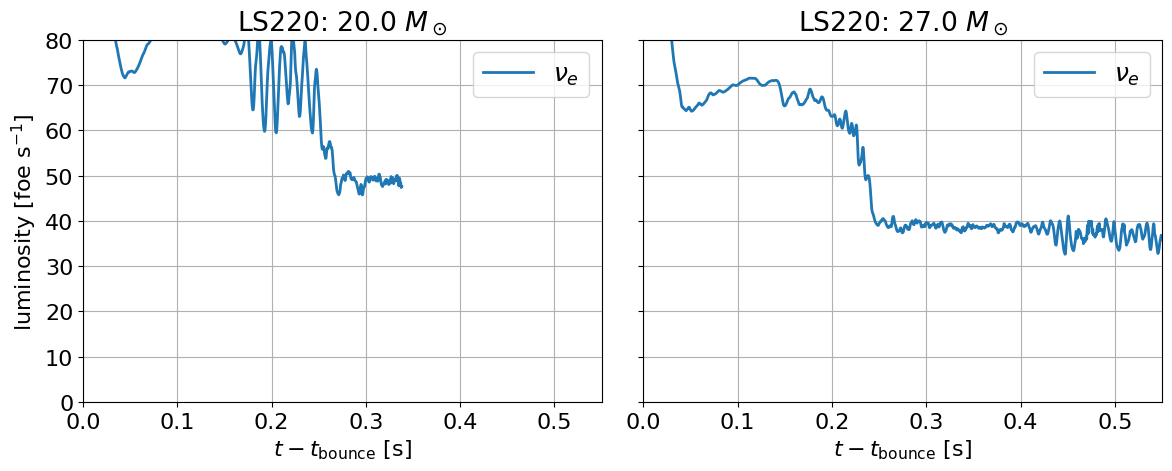

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True, tight_layout=True)

for i, model in enumerate([m20, m27]):
    ax = axes[i]
    ax.plot(model.time, model.luminosity[Flavor.NU_E]/1e51,  # Report luminosity in units foe/s
                label=Flavor.NU_E.to_tex(),
                color='C0',
                ls='-',
                lw=2)
    ax.set(xlim=(0.0, 0.55),
           ylim=(0.0,80),
           xlabel=r'$t-t_{\rm bounce}$ [s]',
           title=r'{}: {} $M_\odot$'.format(model.metadata['EOS'], model.metadata['Progenitor mass'].value))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=18)

axes[0].set(ylabel=r'luminosity [foe s$^{-1}$]');

In [7]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = NoTransformation()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 50*u.ms

ispec = model.get_initial_spectra(t, E)
ospec_nmo = model.get_transformed_spectra(t, E, xform_nmo)

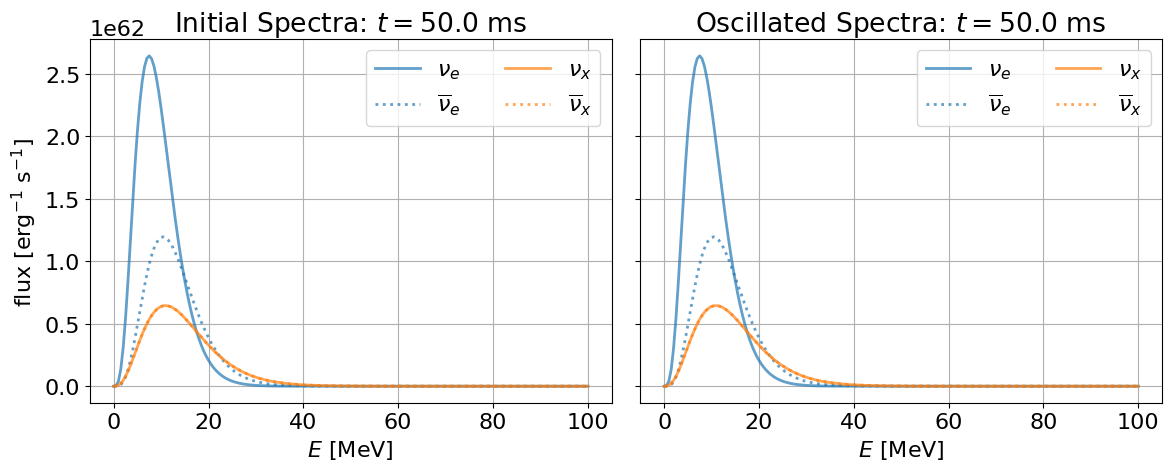

In [8]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: $t = ${:.1f}'.format(t))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]');


In [15]:
model.get_transformed_spectra?